In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os
import ast
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import plotly.express as px
from collections import defaultdict
from copy import deepcopy
import random
import time
import itertools
import math
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [2]:
def search_and_load_csv(folder_path, keyword):

    all_dataframes = []  # ロードされたすべてのDataFramesを保存する
    
    # フォルダとサブフォルダ内のファイルを反復処理する
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # ファイルがCSVファイルで、ファイル名にキーワードが含まれているかチェックする
            if keyword in file and file.endswith('.csv'):
                file_path = os.path.join(root, file)
                try:
                    # CSVファイルをDataFrameに読み込む
                    df = pd.read_csv(file_path)
                    all_dataframes.append(df)
                    print(f"ファイル読み込み成功: {file_path}")
                except Exception as e:
                    print(f"ファイル読み込めない {file_path}: {e}")

    if all_dataframes:
        combined_df = pd.concat(all_dataframes, ignore_index=True)
        return combined_df
    else:
        print("該当するCSVファイルが見つかりません")
        return pd.DataFrame()
    
for i in np.arange(1,10001):# 使用例
    folder = "D:\\pysrc\\wang_data\\jobset\\double normal\\j1[5,1],j2[8,1]\\p1[5,1],p2[8,1]\\machine[4]\\t1[10,1],t2[15,1]\\seed[3]" 
    keyword = ","+str(i)+"gene"  # キーワードを変わる
    globals()[f"df{i}"] = search_and_load_csv(folder, keyword)

# 打印结果
#if not df_i.empty:
    #print("合并后的DataFrame:")
    #print(df_i.head())
#else:
    #print("未加载任何数据。")


ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[6]c,1gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[6]r[5]c,2gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[5]c,3gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[5]r[6]c,4gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[7]r[4]c,5gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[5]c,6gene.csv
ファイル読み込み成功: D:\pysrc\wang_data\jobset\double normal\j1[5,1],j2[8,1]\p1[5,1],p2[8,1]\machine[4]\t1[10,1],t2[15,1]\seed[3]\[4]r[7]c,7gene.csv
ファイル読み込み成功: D:\pysrc

In [13]:
number=input('何回目のジョブデータを見たい?')

df = globals()[f"df{number}"]
#print(df)
T_gene = pd.DataFrame(index=df.index, columns=df.columns)
MS_gene = pd.DataFrame(index=df.index, columns=df.columns)


for col in df.columns:
    for idx in df.index:
        value = df.loc[idx, col]
        if value.startswith('(') and value.endswith(')'):  # 判断元素是否为元组字符串
            # 使用 ast.literal_eval 安全地将字符串转换为元组
            value_tuple = ast.literal_eval(value)
            T_gene.loc[idx, col] = float(value_tuple[1]) 
            MS_gene.loc[idx, col] = float(value_tuple[0]) 
        else:
            try:
                # 如果是单一数字（字符串形式），尝试转换为浮动数值
                T_gene.loc[idx, col] = float(value)
                MS_gene.loc[idx, col] = float(value)
            except ValueError:
                # 如果不能转换为数字，则保留原值
                T_gene.loc[idx, col] = value
                MS_gene.loc[idx, col] = value

T_gene = T_gene.to_numpy()  
T_gene = T_gene[:,1:].astype(int)
MS_gene = MS_gene.to_numpy() 
MS_gene = MS_gene[:,1:].astype(int)

print(number,'回目の作業時間データ：\n',T_gene)
print(number,'回目の作業機械データ：\n',MS_gene)


55 回目の作業時間データ：
 [[15 10 10 15 11 14  0  0]
 [14 14 14 10  0  0  0  0]
 [ 9 16  9  9 15  0  0  0]
 [ 9 10 13 10  0  0  0  0]
 [16  8 10 10  9  8  9  9]
 [14 10 10  8  8  0  0  0]
 [ 9  9  9 16 10  8  0  0]
 [16 16 14  8  0  0  0  0]]
55 回目の作業機械データ：
 [[1 3 1 4 3 2 0 0]
 [1 2 3 2 0 0 0 0]
 [1 4 2 1 4 0 0 0]
 [3 2 4 2 0 0 0 0]
 [2 1 2 3 2 1 3 1]
 [4 1 2 3 1 0 0 0]
 [1 2 4 1 4 3 0 0]
 [2 3 2 4 0 0 0 0]]


In [4]:
dfs = {}
T_genes = {}
MS_genes = {}

for i in np.arange(1,10001):
    df= globals()[f"df{i}"]
    T_gene = pd.DataFrame(index=df.index, columns=df.columns)
    MS_gene = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        for idx in df.index:
            value = df.loc[idx, col]
            if value.startswith('(') and value.endswith(')'):  # 判断元素是否为元组字符串
                 # 使用 ast.literal_eval 安全地将字符串转换为元组
                value_tuple = ast.literal_eval(value)
                T_gene.loc[idx, col] = float(value_tuple[1]) 
                MS_gene.loc[idx, col] = float(value_tuple[0]) 
            else:
                try:
                    # 如果是单一数字（字符串形式），尝试转换为浮动数值
                    T_gene.loc[idx, col] = float(value)
                    MS_gene.loc[idx, col] = float(value)
                except ValueError:
                    # 如果不能转换为数字，则保留原值
                    T_gene.loc[idx, col] = value
                    MS_gene.loc[idx, col] = value
    
    T_gene = T_gene.to_numpy()  
    globals()[f"T_gene{i}"] = T_gene[:,1:].astype(int)
    MS_gene = MS_gene.to_numpy() 
    globals()[f"MS_gene{i}"] = MS_gene[:,1:].astype(int)
    

In [5]:
LENGTH=300
WIDE=50
best_t=9999 #最短时间设定

GANTT_CHART = pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)
#print(gantt_chart)

OPERATION = pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)

In [9]:
print(T_gene55)
print(MS_gene55)

[[15 10 10 15 11 14 -1 -1]
 [14 14 14 10 -1 -1 -1 -1]
 [ 9 16  9  9 15 -1 -1 -1]
 [ 9 10 13 10 -1 -1 -1 -1]
 [16  8 10 10  9  8  9  9]
 [14 10 10  8  8 -1 -1 -1]
 [ 9  9  9 16 10  8 -1 -1]
 [16 16 14  8 -1 -1 -1 -1]]
[[ 1  3  1  4  3  2 -1 -1]
 [ 1  2  3  2 -1 -1 -1 -1]
 [ 1  4  2  1  4 -1 -1 -1]
 [ 3  2  4  2 -1 -1 -1 -1]
 [ 2  1  2  3  2  1  3  1]
 [ 4  1  2  3  1 -1 -1 -1]
 [ 1  2  4  1  4  3 -1 -1]
 [ 2  3  2  4 -1 -1 -1 -1]]


In [7]:
#初期解生成
ID=input('何回目のジョブデータを見たい?')
T_gene = globals()[f"T_gene{ID}"]
MS_gene = globals()[f"MS_gene{ID}"]
T_gene[T_gene == 0] = -1
MS_gene[MS_gene == 0] = -1
#print('t',T_gene)
#print('m',MS_gene)
    
gantt_chart_J=pd.DataFrame({
    'M1':np.zeros(LENGTH),
    'M2':np.zeros(LENGTH),
    'M3':np.zeros(LENGTH),
    'M4':np.zeros(LENGTH)},
    index = [np.arange(1,LENGTH+1)],dtype=int)

operation_J=pd.DataFrame({
    'job':np.zeros(WIDE),
    'process':np.zeros(WIDE)},
    index = [np.arange(1,WIDE+1)],dtype=int)
    
state_M=np.zeros(4,dtype=int)
state_J=np.zeros(T_gene.shape[0],dtype=int)
#print(state_J)
check_J = np.zeros_like(T_gene)
check_J[T_gene == -1] = -1
#print(check_J)
o=1
    
for t in np.arange(1,LENGTH+1):
    if np.any(state_M==0) and np.any(state_J==0):
        for j in np.arange(0,T_gene.shape[0]):
            if state_J[j]==0:
                for i in np.arange(0,T_gene.shape[1]):
                    if check_J[j,i]==0 and state_J[j]==0:
                        if i==0 or (i>0 and check_J[j,i-1]==1):
                            m=MS_gene[j,i]-1
                            if state_M[m]==0:
                                state_M[m]=T_gene[j,i]
                                state_J[j]=T_gene[j,i]
                                check_J[j,i]=1
                                gantt_chart_J.iloc[t-1:t-1+T_gene[j,i],m]=j+1
                                operation_J.loc[o,'job']=j+1
                                operation_J.loc[o,'process']=i+1
                                o+=1
    state_M[state_M !=0] -= 1
    state_J[state_J !=0] -= 1
    if np.all(check_J!=0):
        break
   
for t in np.arange(1,LENGTH+1):
    if np.all(gantt_chart_J.iloc[t-1,:]==0):    
        break

origin_t=t

#print(ID,'回目の初期解ガントチャート:\n',gantt_chart_J)
print(ID,'回目の初期解操作順番:\n',operation_J) 
print(ID,'回目の初期解処理時間:\n',origin_t,'時刻')        
        
#raw_data1=gantt_chart_J
#np.savetxt(fname='d:/pysrc/data/gantt_chart_J.csv',X=raw_data1,fmt='%0d',delimiter=',')
#raw_data2=operation_J
#np.savetxt(fname='d:/pysrc/data/operation_J.csv',X=raw_data2,fmt='%0d',delimiter=',')
#raw_data3=list_time_J7
#np.savetxt(fname='d:/pysrc/data/list_time_J7.csv',X=raw_data3,fmt='%0d',delimiter=',')

55 回目の初期解操作順番:
     job  process
1     1        1
2     4        1
3     5        1
4     6        1
5     1        2
6     2        1
7     4        2
8     4        3
9     8        1
10    1        3
11    1        4
12    3        1
13    2        2
14    8        2
15    5        2
16    3        2
17    4        4
18    6        2
19    1        5
20    5        3
21    7        1
22    2        3
23    1        6
24    5        4
25    2        4
26    3        3
27    3        4
28    5        5
29    3        5
30    5        6
31    6        3
32    5        7
33    7        2
34    5        8
35    6        4
36    7        3
37    8        3
38    6        5
39    8        4
40    7        4
41    7        5
42    7        6
43    0        0
44    0        0
45    0        0
46    0        0
47    0        0
48    0        0
49    0        0
50    0        0
55 回目の初期解処理時間:
 187 時刻


C:\Users\G15\AppData\Local\Temp\ipykernel_30048\3089188087.py:61: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(operation_J.loc[k,'job'])==int(operation_J.loc[gene_o,'job']) and int(operation_J.loc[k,'process'])==int(operation_J.loc[gene_o,'process'])-1:
C:\Users\G15\AppData\Local\Temp\ipykernel_30048\3089188087.py:30: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(operation_J.loc[k,'job'])==int(operation_J.loc[gene_o,'job']) and int(operation_J.loc[k,'process'])==int(operation_J.loc[gene_o,'process'])+1:


2000
238
    job  process
1     4        1
2     3        2
3     3        3
4     8        1
5     4        3
6     6        4
7     6        5
8     3        1
9     1        1
10    6        1
11    7        1
12    5        3
13    3        4
14    1        2
15    6        2
16    6        3
17    5        4
18    5        6
19    4        2
20    2        1
21    3        5
22    1        3
23    7        6
24    8        2
25    1        5
26    2        3
27    1        4
28    2        4
29    2        2
30    8        3
31    4        4
32    1        6
33    7        2
34    7        4
35    7        5
36    5        7
37    5        8
38    8        4
39    5        1
40    7        3
41    5        5
42    5        2
43    0        0
44    0        0
45    0        0
46    0        0
47    0        0
48    0        0
49    0        0
50    0        0


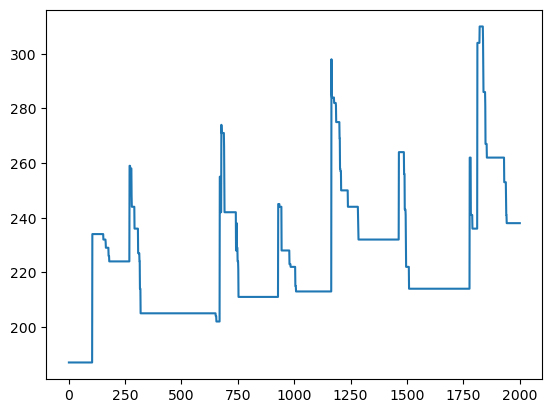

In [8]:
#許容解生成
G_END = 2000
PROB = 0.005#より悪い結果を受ける確率
O=o-1#操作数合計
kyoyo=0.85


best_operation_J=operation_J
best_t=origin_t

df_best_t = pd.DataFrame({
    'xdf':np.arange(1,G_END+1),
    'ydf':np.arange(1,G_END+1)},
    index = np.arange(1,G_END+1))

for g in np.arange(1,G_END+1):

    operation_J=best_operation_J
    #print(operation_J)
    orientation = random.choice([-1, 1])#方向決め
    #orientation = 1 

    if orientation == 1 :#操作後回し
        #print('操作後回し')
    
        gene_o = random.randint(1,O-1)#変わる操作の番号を決める
        #print('変わる操作の番号:',gene_o)
    
        for k in np.arange(gene_o+1,O+1):#同じジョブのP+1のプロセスの番号を探す
            if int(operation_J.loc[k,'job'])==int(operation_J.loc[gene_o,'job']) and int(operation_J.loc[k,'process'])==int(operation_J.loc[gene_o,'process'])+1:
                nearest_operation=k
                break
            if k==O:
                nearest_operation=k
            
        delta_distance = nearest_operation - gene_o - 1#後回し最大距離を決め
        #print('delta_distance:',delta_distance)
        if delta_distance == 0:
            distance=0#後回すできない
        if delta_distance > 0:
            distance = random.randint(1,delta_distance)#後回し距離を決め
        #print('distance:',distance)
    
        temporary_job=operation_J.iloc[gene_o-1,0]#変わる操作のジョブ情報を保存
        temporary_process=operation_J.iloc[gene_o-1,1]#変わる操作のプロセス情報を保存
        #print(temporary_job,temporary_process)
        #print('行く先:',gene_o+orientation*distance)
    
        for k in np.arange(gene_o,gene_o+orientation*distance):#新しい操作順番生成する
            operation_J.loc[k,'job']=operation_J.iloc[k,0]
            operation_J.loc[k,'process']=operation_J.iloc[k,1]
        operation_J.loc[gene_o+orientation*distance,'job']=temporary_job
        operation_J.loc[gene_o+orientation*distance,'process']=temporary_process
    

    if orientation == -1 :#操作前倒し
        #print('操作前倒し')
        gene_o = random.randint(2,O)#変わる操作の番号を決める
        #print('変わる操作の番号:',gene_o)
        for k in np.arange(gene_o-1,0,-1):#同じジョブのP-1のプロセスの番号を探す
            if int(operation_J.loc[k,'job'])==int(operation_J.loc[gene_o,'job']) and int(operation_J.loc[k,'process'])==int(operation_J.loc[gene_o,'process'])-1:
                nearest_operation=k
                break
            if k==1:
                nearest_operation=k
        
        delta_distance = gene_o - nearest_operation#前倒し最大距離を決め
        #print('delta_distance:',delta_distance)
        distance = random.randint(1,delta_distance)#前倒し距離を決め
        #print('distance:',distance)
    
        temporary_job=operation_J.iloc[gene_o-1,0]#変わる操作のジョブ情報を保存
        temporary_process=operation_J.iloc[gene_o-1,1]#変わる操作のプロセス情報を保存
        #print(temporary_job,temporary_process)
        #print('行く先:',gene_o+orientation*distance)
    
        for k in np.arange(gene_o,gene_o+orientation*distance-1,-1):#新しい操作順番生成する
            operation_J.loc[k,'job']=operation_J.iloc[k-2,0]
            operation_J.loc[k,'process']=operation_J.iloc[k-2,1]
        operation_J.loc[gene_o+orientation*distance,'job']=temporary_job
        operation_J.loc[gene_o+orientation*distance,'process']=temporary_process
    
    #print('新しい操作順番:\n',operation_J7)
    
    #新しい操作順番より総作業時間算出
    state_M=np.zeros(4,dtype=int)
    state_J=np.zeros(T_gene.shape[0],dtype=int)
    #print(state_J)
    check_J = np.zeros_like(T_gene)
    check_J[T_gene == -1] = -1
    #print(check_J)
    
    for t in np.arange(1,LENGTH+1):
        for i in np.arange(1,o):
            job=operation_J.iloc[i-1,0]
            #print(job)
            process=operation_J.iloc[i-1,1]
            #print(process)
            if check_J[job-1,process-1]==0:
                mechine=MS_gene[job-1,process-1]
                if state_M[mechine-1]==0 and state_J[job-1]==0:
                    state_M[mechine-1]=T_gene[job-1,process-1]
                    state_J[job-1]=T_gene[job-1,process-1]
                    check_J[job-1,process-1]=1
                else:
                    break                
        state_M[state_M !=0] -= 1
        state_J[state_J !=0] -= 1
        if np.all(check_J!=0):
            break
    #print(check_J,job,process)

    t=t+T_gene[job-1,process-1]

    #print('新しい操作順番時間:\n',t)
    if t<=best_t:
        best_t=t
        best_operation_J=operation_J

    if t>best_t:
        while random.random()<PROB:
            best_t=t
            best_operation_J=operation_J

    df_best_t.iloc[g-1,1]=best_t
    
    if best_t<origin_t*kyoyo:
        break

print(g)
print(best_t)
print(best_operation_J)
plt.plot('xdf','ydf',data=df_best_t[0:g])
plt.show

raw_data=best_operation_J
np.savetxt(fname='d:/pysrc/data/GA_operation.csv',X=raw_data,fmt='%0d',delimiter=',')